In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("datasetforSVM.csv")

In [3]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [6]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.svm import SVC #support vector classifier
classifier=SVC(kernel="rbf",random_state=0) #kernel can be linear or rbf or poly
classifier.fit(x_tr,y_tr)
y_pred=classifier.predict(x_te)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
a=accuracy_score(y_te,y_pred)
a

0.95

In [24]:
print(confusion_matrix(y_te,y_pred))

[[55  3]
 [ 1 21]]


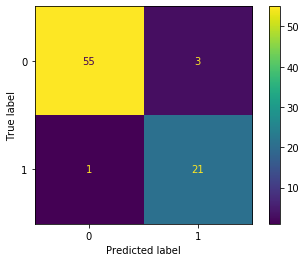

In [25]:
plot_confusion_matrix(estimator=classifier,X=x_te,y_true=y_te)

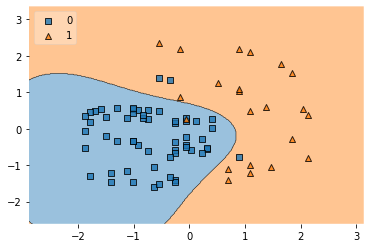

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=x_te,y=y_te,clf=classifier,legend=2)
plt.show()